In [1]:
import os
os.chdir('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/Code/Library')

from ExperimentFunc import exp_func, beta_gen_nonneg
from Step1 import solve_beta_nonneg
from Step2 import find_v_nonneg
from Step3 import solve_omega, gw_nonneg, proj_nonneg_tan_cone, proj_nonneg_neg_tan_cone

from math import log
import numpy as np

from sklearn.isotonic import IsotonicRegression

from scipy import linalg
from scipy import stats

from collections import namedtuple

from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
Params = namedtuple('Params', ['step1', 'step2', 'step3'])

### <span style="color:purple">1) Cov(X) = I</span>

In [5]:
N = 100
n = 10000
p = 50

Sigma_sqrt = np.eye(p)
noise_sd = 2
debias_idx = p - 1
param_set = Params([], 
                   [], 
                   [gw_nonneg, proj_nonneg_tan_cone, proj_nonneg_neg_tan_cone])

In [6]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_nonneg, 
             solve_beta_nonneg, 
             find_v_nonneg, 
             solve_omega)

iter: 0
The L2 error:  0.1768834153257002
iter: 1
The L2 error:  0.16333977888584086
iter: 2
The L2 error:  0.16124442086318302
iter: 3
The L2 error:  0.17712382035549584
iter: 4
The L2 error:  0.18457380711985666
iter: 5
The L2 error:  0.18945671105032177
iter: 6
The L2 error:  0.14343681649210688
iter: 7
The L2 error:  0.18066760187463138
iter: 8
The L2 error:  0.18658897771307317
iter: 9
The L2 error:  0.17105639122292304
iter: 10
The L2 error:  0.14280497194322353
iter: 11
The L2 error:  0.19601647104156508
iter: 12
The L2 error:  0.18149007642695034
iter: 13
The L2 error:  0.1556115917395364
iter: 14
The L2 error:  0.17178551485181107
iter: 15
The L2 error:  0.18072234737071294
iter: 16
The L2 error:  0.2027804725187716
iter: 17
The L2 error:  0.14619421792378934
iter: 18
The L2 error:  0.178644089029094
iter: 19
The L2 error:  0.1953096818009005
iter: 20
The L2 error:  0.1572221635837464
iter: 21
The L2 error:  0.15845972824272073
iter: 22
The L2 error:  0.1822372877873379
iter: 

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [7]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -0.4338481950391158


In [8]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  -0.15922223416776896


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

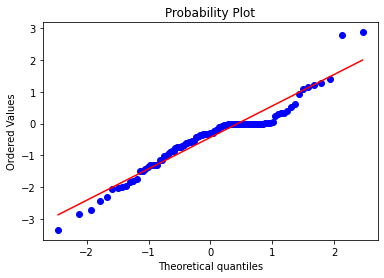

In [9]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

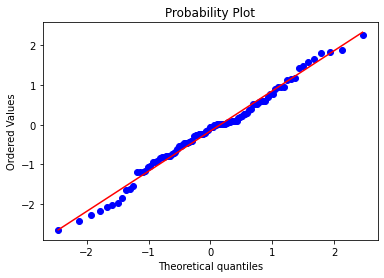

In [10]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [11]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/NonNeg/identity_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/NonNeg/identity_z.npy', z)

### <span style="color:purple">2) Cov(X) with bounded eigenvalues</span>

In [11]:
# other parameters are the same as the cov=I case

# Generate a cov matrix with bounded eigenvalues
# generate eigenvalues
cov_eigv = np.random.uniform(low = 0.3, high = 3.0, size = (p,))
D_sqrt = np.diag(cov_eigv**0.5)
# generate an orthonormal matrix
a = np.random.normal(size = (p,p))
u, s, vh = np.linalg.svd(a.T@a, full_matrices=True)
# generate the square root of cov matrix 
Sigma_sqrt = D_sqrt @ u.T

In [12]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_nonneg, 
             solve_beta_nonneg, 
             find_v_nonneg, 
             solve_omega)

iter: 0
The L2 error:  0.14730121769728635
iter: 1
The L2 error:  0.13936983385032262
iter: 2
The L2 error:  0.12688433816499448
iter: 3
The L2 error:  0.1361615677753378
iter: 4
The L2 error:  0.14998166832712365
iter: 5
The L2 error:  0.13667596072688695
iter: 6
The L2 error:  0.1644177196774536
iter: 7
The L2 error:  0.1364217457378052
iter: 8
The L2 error:  0.13442847403320904
iter: 9
The L2 error:  0.14755399747203599
iter: 10
The L2 error:  0.13010807106211056
iter: 11
The L2 error:  0.153107379373344
iter: 12
The L2 error:  0.1294617524368603
iter: 13
The L2 error:  0.12051305499381344
iter: 14
The L2 error:  0.1399529780000115
iter: 15
The L2 error:  0.14009296320213818
iter: 16
The L2 error:  0.14707099776385998
iter: 17
The L2 error:  0.1753894695019914
iter: 18
The L2 error:  0.18598539115381732
iter: 19
The L2 error:  0.17072026080626532
iter: 20
The L2 error:  0.13649086391629897
iter: 21
The L2 error:  0.16281271571684322
iter: 22
The L2 error:  0.1538779764533839
iter: 2

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [13]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -0.3132176278059198


In [14]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  0.21109199918983756


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

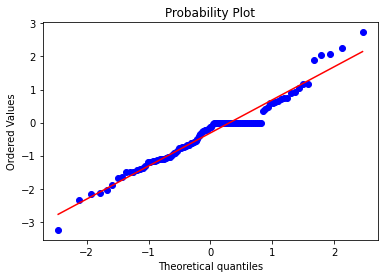

In [15]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

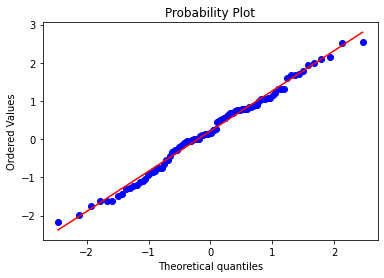

In [16]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [66]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/NonNeg/bddeig_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/NonNeg/bddeig_z.npy', z)

### <span style="color:purple">3) Cov(X) is the Cov of AR(1) Process</span>

In [67]:
# other parameters are the same as the cov=I case

# Generate the squar root of cov matrix
rho = 0.4
rho_vec = []
for i in range(p):
    rho_vec.append(rho**i)
rho_vec = np.array(rho_vec)
# The cholesky decomposition of cov == the squar root of cov
Sigma_sqrt = [rho_vec]
for i in range(1, p):
    rho_vec_shifted = np.concatenate((np.zeros(i), rho_vec[:-i]))
#     print(rho_vec_shifted)
    Sigma_sqrt.append(rho_vec_shifted * (1-rho**2)**0.5)
Sigma_sqrt = np.array(Sigma_sqrt)

In [68]:
z, z_biased = exp_func(N,
             n,
             p, 
             Sigma_sqrt, 
             noise_sd, 
             debias_idx,
             param_set, 
             beta_gen_nonneg, 
             solve_beta_nonneg, 
             find_v_nonneg, 
             solve_omega)

iter: 0
The L2 error:  0.22885926780490654
iter: 1
The L2 error:  0.2105462119606363
iter: 2
The L2 error:  0.17103403433457456
iter: 3
The L2 error:  0.1665113404538216
iter: 4
The L2 error:  0.230066878002063
iter: 5
The L2 error:  0.16208471336285962
iter: 6
The L2 error:  0.21020811222078228
iter: 7
The L2 error:  0.15741094807434125
iter: 8
The L2 error:  0.20401247020312588
iter: 9
The L2 error:  0.1509729648882621
iter: 10
The L2 error:  0.1929631488098761
iter: 11
The L2 error:  0.1553802440032125
iter: 12
The L2 error:  0.23346901200363232
iter: 13
The L2 error:  0.18758388244296204
iter: 14
The L2 error:  0.15990469938637392
iter: 15
The L2 error:  0.21635039147682159
iter: 16
The L2 error:  0.1760420213311556
iter: 17
The L2 error:  0.15977554500695543
iter: 18
The L2 error:  0.18198817897244482
iter: 19
The L2 error:  0.19231513044983098
iter: 20
The L2 error:  0.15245697153848625
iter: 21
The L2 error:  0.1716919628303185
iter: 22
The L2 error:  0.18803907611626794
iter: 2

#### Compare the mean of the (debiased_beta - beta) and (non-debiased_beta - beta)

In [69]:
mean_non_debiased = np.mean(z_biased)
print("The mean of (non_debiased_beta - beta) is: ", mean_non_debiased)

The mean of (non_debiased_beta - beta) is:  -0.15231742503629703


In [70]:
mean_debiased = np.mean(np.array(z))
print("The mean of (debiased_beta - beta) is: ", mean_debiased)

The mean of (debiased_beta - beta) is:  0.056692927477771535


#### Check if the (debiased_beta - beta) and (non-debiased_beta - beta) is standard normal

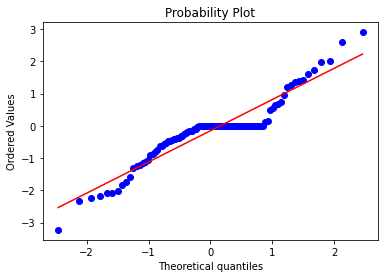

In [71]:
# non-debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z_biased, plot=ax)
plt.show()

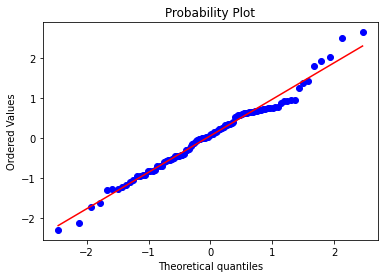

In [72]:
# debiased
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(z, plot=ax)
plt.show()

#### Save the simulation results

In [73]:
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/NonNeg/ar1_z_biased.npy', z_biased)
np.save('/Users/yufei/Documents/2-CMU/DebiasingCvxConstrained/ExpResults/NonNeg/ar1_z.npy', z)